In [3]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
n, m, timesteps = 10000, 10, 60 

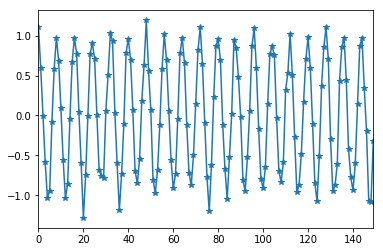

In [116]:
# own fake data
org_dct = {str(m_i):
            (np.sin(np.arange(n*timesteps)*(np.random.randn())-np.random.randn()*100)+(np.random.randn(n*timesteps))*.1)
           for m_i in range(m)
          }
df = pd.DataFrame().from_dict(org_dct)
del org_dct
df.iloc[:150,0].plot(marker='*')

In [117]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.114446,-0.592898,0.204955,0.505713,-0.961224,-0.122878,-0.314546,-0.187950,-0.015137,-0.296673
1,0.600313,-0.946403,0.589096,0.917003,-0.942033,0.877854,-0.380102,0.508302,1.012249,-0.883460
2,-0.006571,-0.334670,0.626638,0.778315,-0.877141,0.191343,-0.550421,0.564890,0.149244,-0.139091
3,-0.585057,0.583154,0.871155,0.226498,-0.518058,-1.120305,-0.699760,0.879472,-1.013508,0.733990
4,-1.034596,1.084056,0.882731,-0.612957,-0.114770,-0.379697,-0.904492,1.114850,0.155097,0.436419


In [118]:
def to_tabular_sequences(df, seq_len=60, feature_name=[]):
    new_df = [np.array([]) for _ in range(int(df.shape[0]/seq_len))]
    i = 0
    if not np.floor(df.shape[0]/seq_len) == (df.shape[0]/seq_len):
        print(np.floor(df.shape[0]/seq_len), (df.shape[0]/seq_len))
        Warning('You will lose the last part of your dataset.')
        
    for j in range(df.shape[1]): # 10 
        current_start_timestep = 0
        for i_n in range(int(np.floor(df.shape[0]/seq_len))): # 1000           
#             print(current_start_timestep,current_start_timestep+seq_len)
            new_df[i_n] = np.concatenate([new_df[i_n],                                          
                                          df.iloc[current_start_timestep:current_start_timestep+seq_len, j],                                          
                                         ])
            current_start_timestep += seq_len
        
            
    df_new= pd.DataFrame().from_dict(new_df)
    if feature_name == []:
        feature_name = [str(k) for k in range(df.shape[1])]
        
    df_new.columns = [f+'.'+str(i) for f in feature_name for i in range(seq_len)]
    
    return df_new

tab_df = to_tabular_sequences(df,seq_len=timesteps)
print(tab_df.shape)
tab_df.head()


(10000, 600)


,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,9.50,9.51,9.52,9.53,9.54,9.55,9.56,9.57,9.58,9.59
0,1.114446,0.600313,-0.006571,-0.585057,-1.034596,-0.941631,-0.077671,0.587005,0.975617,0.677658,...,-1.036854,-0.643083,0.848557,0.826092,-0.337760,-0.897698,0.060898,0.842003,0.325851,-0.902178
1,-0.913026,-0.734200,-0.041426,0.777901,0.973380,0.653314,-0.116416,-0.720925,-0.874417,-0.497024,...,0.192062,0.950734,0.104042,-0.722278,-0.538008,0.831013,0.640009,-0.489455,-0.882031,0.216450
2,0.982462,0.591904,-0.104168,-0.842713,-1.074895,-0.503035,0.368854,0.853609,1.108681,0.703296,...,0.607822,-0.565465,-0.901573,0.236676,1.222013,-0.014732,-1.200742,-0.438795,0.982933,0.500335
3,-0.861132,-0.329573,0.455247,0.938038,0.862129,0.305723,-0.474433,-1.015828,-0.733837,-0.287970,...,-1.136329,-0.452612,1.028219,0.602593,-0.572294,-1.055045,0.516135,0.942395,0.032582,-1.071227
4,0.772389,0.299902,-0.304926,-0.963405,-1.023088,-0.239489,0.552001,0.980856,0.772081,0.217311,...,0.381584,0.750149,-0.043188,-1.003008,-0.143461,1.131107,0.706158,-0.818526,-0.768612,0.616678


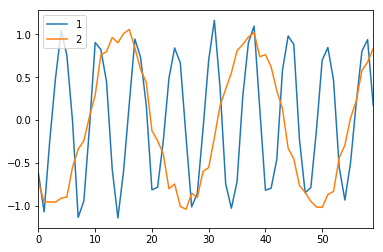

In [119]:
def plot_tab(df,row,seq_len=60, features=None):
    df_plot = np.array( np.split(df.iloc[row,:],df.shape[1]/seq_len))
    
    if features is None:
        features = range(df_plot.shape[0])
    pd.DataFrame(df_plot).T.loc[:,features].plot()
    
plot_tab(tab_df,1,features=[1,2])  

In [120]:
from fastai import *
from fastai.tabular import *

In [121]:
valid_idx = range(len(tab_df)-2000, len(tab_df))
print(valid_idx,tab_df.shape)
feature_name = [str(k) for k in range(10)]
feature_columns = [f+'.'+str(i) for f in feature_name for i in range(30)]
cat_names = []
dep_var = '0.59'
feature_columns.append(dep_var)
tab_df.loc[:,feature_columns].head()

range(8000, 10000) (10000, 600)


,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,9.21,9.22,9.23,9.24,9.25,9.26,9.27,9.28,9.29,0.59
0,1.114446,0.600313,-0.006571,-0.585057,-1.034596,-0.941631,-0.077671,0.587005,0.975617,0.677658,...,1.100737,0.342460,-0.795071,-0.536118,0.666396,0.845843,-0.447279,-0.817732,0.032371,-0.554713
1,-0.913026,-0.734200,-0.041426,0.777901,0.973380,0.653314,-0.116416,-0.720925,-0.874417,-0.497024,...,-0.507859,-0.937069,-0.008017,0.966113,0.237674,-1.110846,-0.684935,0.789810,0.915796,0.703413
2,0.982462,0.591904,-0.104168,-0.842713,-1.074895,-0.503035,0.368854,0.853609,1.108681,0.703296,...,-0.488590,0.684048,0.751033,-0.623372,-0.867582,0.211122,0.928282,0.148698,-0.905295,-0.879144
3,-0.861132,-0.329573,0.455247,0.938038,0.862129,0.305723,-0.474433,-1.015828,-0.733837,-0.287970,...,0.889053,0.019115,-0.901737,-0.365437,0.705665,0.598105,-0.735526,-0.910243,0.254413,1.058759
4,0.772389,0.299902,-0.304926,-0.963405,-1.023088,-0.239489,0.552001,0.980856,0.772081,0.217311,...,-0.693414,-0.868973,0.457096,0.999172,-0.128114,-1.007975,-0.298816,1.066459,0.660450,-1.035437


In [122]:
procs = [FillMissing, Categorify, Normalize]
data = TabularDataBunch.from_df('data', tab_df.loc[:,feature_columns], dep_var, valid_idx=valid_idx, procs=procs)

In [123]:
learn = tabular_learner(data,[16,16],metrics=mean_absolute_error, callback_fns=ShowGraph)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


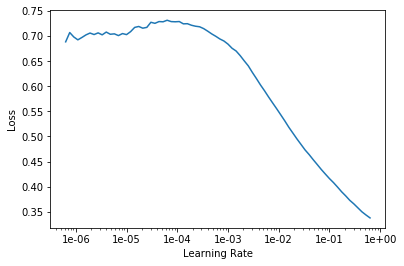

In [124]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,mean_absolute_error,time
0,0.036876,0.021155,0.118292,00:01
1,0.032165,0.018682,0.111314,00:01
2,0.043541,0.013645,0.093738,00:01
3,0.034051,0.026890,0.133935,00:01
4,0.031514,0.026749,0.138565,00:01
5,0.030528,0.019548,0.111530,00:01
6,0.027726,0.021749,0.120564,00:01
7,0.025895,0.013727,0.093854,00:01
8,0.024393,0.010545,0.081759,00:01
9,0.018428,0.010693,0.082767,00:01


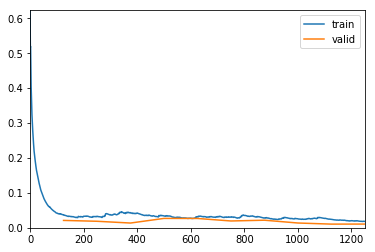

In [125]:
learn.fit_one_cycle(10,1e-1)